## A lei de cotas funcionou, mas ainda há muito o que fazer.

A Lei n° 12.711/2012 garante que 50% das matrículas por curso e turno universidades e escolas do governo federal sejam oriundos do ensino médio público. Desses vagas são divididas metade para estudantes de escolas públicas e metade para pessoas de baixa renda. Também são levados em conta nessas vagas um percentual para pessoas Negras,Pardas e Indígenas e pessoas com deficiência.

Neste link, tem uma ótima imagem explicando com é a divisão das vagas nos estabelecimentos de ensino controlados pelo governo (https://static.mundoeducacao.uol.com.br/vestibular/2019/10/exemplo-lei-cotas.jpg).

Para esse estudo, foram utilizados dados do censo da educação superior brasileira. O meu objetivo é responder a 3 perguntas?

- O número de pessoas NPI(Negras, Pardas e Indígenas) na universidade pública aumentou?
- O número de pessoas NPI(Negras, Pardas e Indígenas) formadas na universidade pública aumentou?
- A cota foi um sistema eficiênte? Qual colocou mais pessoas NPI na universidade federal?

## A Universidade Federal está mais diversa?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')



def AmostrarDados(arquivo,colunas,n_grupos,n_amostras_por_grupo):
    totalAmostras = pd.DataFrame()
    if arquivo in ['DM_ALUNO_2015.CSV','DM_ALUNO_2016.CSV']:
        coluna_total = ['CO_CATEGORIA_ADMINISTRATIVA','CO_NIVEL_ACADEMICO']
    else:
        coluna_total = ['TP_CATEGORIA_ADMINISTRATIVA','TP_NIVEL_ACADEMICO'] 
    coluna_total += colunas
    
    for chunk in pd.read_csv(arquivo, sep= "|", usecols = coluna_total, chunksize = n_grupos):
        
        novas_amostras = chunk.sample(n=n_amostras_por_grupo)

        totalAmostras = pd.concat([totalAmostras,novas_amostras])
        
    if arquivo in ['DM_ALUNO_2015.CSV','DM_ALUNO_2016.CSV']:
        totalAmostras.columns = ['TP_CATEGORIA_ADMINISTRATIVA','TP_NIVEL_ACADEMICO'] + colunas
    
    mascara = ((totalAmostras['TP_CATEGORIA_ADMINISTRATIVA']==1)|(totalAmostras['TP_CATEGORIA_ADMINISTRATIVA']==2)|(totalAmostras['TP_CATEGORIA_ADMINISTRATIVA']==3))
    totalAmostras = totalAmostras[mascara]
    mascara_graduacao = (totalAmostras['TP_NIVEL_ACADEMICO'] == 1)
    totalAmostras = totalAmostras[mascara_graduacao]
    return totalAmostras

def PegarPercentualNPIClasse(tabela,classe):
    percentual_NPI = (tabela[classe][3] + tabela[classe][2] +tabela[classe][5]) / tabela[classe].sum()
    return percentual_NPI

def CriarTabelaCont(dados,featureIndex,featureColuna):
    tabela = pd.crosstab(dados[featureIndex],dados[featureColuna])
    return tabela




   Aqui vale ressaltar uma escolha técnica, eu não utilizei todos os dados de cada arquivo pois meu computador não consegui processar esse volume grande de dados. A primeira tentativa foi utilizar o MySQL, porém como eu nunca tinha estudado sobre o assunto (Comecei a estudar agora para tentar resolver este case) e a curva de aprendizado não estava sendo muito rápida, decidi fazer uma amostragem Amostra Sistemática.

In [2]:
def PegarPercentualNPIClasse(tabela,classe):
    percentual_NPI = (tabela[classe][3] + tabela[classe][2] +tabela[classe][5]) / tabela[classe].sum()
    return percentual_NPI

def CriarTabelaCont(dados,featureIndex,featureColuna):
    tabela = pd.crosstab(dados[featureIndex],dados[featureColuna])
    return tabela

In [3]:
lista_arquivos = ['DM_ALUNO_2015.CSV',
                  'DM_ALUNO_2016.CSV',
                  'DM_ALUNO_2017.CSV',
                  'DM_ALUNO_2018.CSV',
                  'SUP_ALUNO_2019.CSV']
anos = [2015,2016,2017,2018,2019]

NPI_CURSANDO_2 = []
NPI_FORMADO_6 = []
NPI_DESVINCULADO_4 = []
NPI_RESERVA_ETNICO_1 = []
NPI_RESERVA_RENDA_1 = []
NPI_RESERVA_ENSINO_1 = []
cont = 0
for arquivo in lista_arquivos:
    ano = anos[cont]
    cont += 1
    if ano != 2016 and ano!=2015:
        dados = AmostrarDados(arquivo,['TP_COR_RACA',
                                       'TP_SITUACAO',
                                       'IN_RESERVA_ETNICO',
                                       'IN_RESERVA_ENSINO_PUBLICO',
                                       'IN_RESERVA_RENDA_FAMILIAR'],100000,5000)
    else:
        dados = AmostrarDados(arquivo,['CO_COR_RACA_ALUNO',
                                       'CO_ALUNO_SITUACAO',
                                       'IN_RESERVA_ETNICO',
                                       'IN_RESERVA_ENSINO_PUBLICO',
                                       'IN_RESERVA_RENDA_FAMILIAR'],100000,5000)
        
        dados.columns = ['TP_CATEGORIA_ADMINISTRATIVA',
                         'TP_NIVEL_ACADEMICO',
                         'TP_COR_RACA',
                         'TP_SITUACAO',
                         'IN_RESERVA_ETNICO',
                         'IN_RESERVA_ENSINO_PUBLICO',
                         'IN_RESERVA_RENDA_FAMILIAR']
    tabela_raca_situacao = CriarTabelaCont(dados,'TP_COR_RACA','TP_SITUACAO')
    tabela_raca_reserva = CriarTabelaCont(dados,'IN_RESERVA_ETNICO','TP_COR_RACA')
    tabela_raca_reserva_ensino = CriarTabelaCont(dados,'IN_RESERVA_ENSINO_PUBLICO','TP_COR_RACA')
    tabela_raca_reserva_renda = CriarTabelaCont(dados,'IN_RESERVA_RENDA_FAMILIAR','TP_COR_RACA')
    
    NPI_CURSANDO_2.append(PegarPercentualNPIClasse(tabela_raca_situacao,2))
    NPI_FORMADO_6.append(PegarPercentualNPIClasse(tabela_raca_situacao,6))
    NPI_DESVINCULADO_4.append(PegarPercentualNPIClasse(tabela_raca_situacao,4))
    
    numero_npi = dados[((dados['TP_COR_RACA'] == 3)|(dados['TP_COR_RACA'] == 2)|(dados['TP_COR_RACA'] == 5))].shape[0]
    NPI_RESERVA_ETNICO_1.append((tabela_raca_reserva[3][1] + tabela_raca_reserva[5][1] + tabela_raca_reserva[2][1])/numero_npi)   
    NPI_RESERVA_ENSINO_1.append((tabela_raca_reserva_ensino[3][1] + tabela_raca_reserva_ensino[5][1] + tabela_raca_reserva_ensino[2][1])/numero_npi)   
    NPI_RESERVA_RENDA_1.append((tabela_raca_reserva_renda[3][1] + tabela_raca_reserva_renda[5][1] + tabela_raca_reserva_renda[2][1])/numero_npi)   

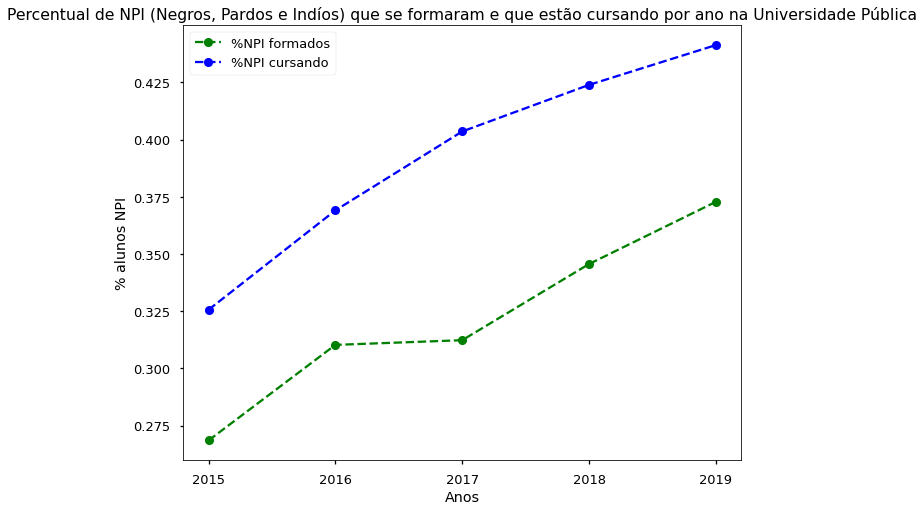

In [4]:
plt.figure(figsize=[10,8])
plt.plot(['2015','2016','2017','2018','2019'], NPI_FORMADO_6, 'b--',marker='o', color='green',label='%NPI formados')
plt.plot(['2015','2016','2017','2018','2019'], NPI_CURSANDO_2, 'b--',marker='o', color='blue',label='%NPI cursando')
plt.legend(loc=0)
plt.ylabel('% alunos NPI')
plt.xlabel('Anos')
plt.title('Percentual de NPI (Negros, Pardos e Indíos) que se formaram e que estão cursando por ano na Universidade Pública')
plt.show()


   Observando o gráfico acima é possível perceber que o número de alunos NPI (Negros, Pardos e Indígenas) vem crescendo. Em 2015 o percentual de alunos NPI que se formavam eram de menos de 27%, em 2019 esse número subiu para aproximadamente 37%, é um incremento significativo no número de trabalhadores NPI qualificados, a cada 100 pessoas formadas na faculdade em 2019, 37 são negras, em 2015 esse número era de aproximadamente 27.
   
   Outro resultado interessante é que o número de alunos NPI cursando támbem aumentou, em 2015 esse número era de aproximadamente 32% e em 2019 subiu para aproximadamente 42%.
   
   Portanto, podemos perceber que com o passar dos anos a Universidade tem apresentado uma diversidade etinica cada vez maior, assim como o conjunto das pessoas formadas. Porém, ainda temos uma pergunta,como as cotas de cunho etinico impactam nisto?

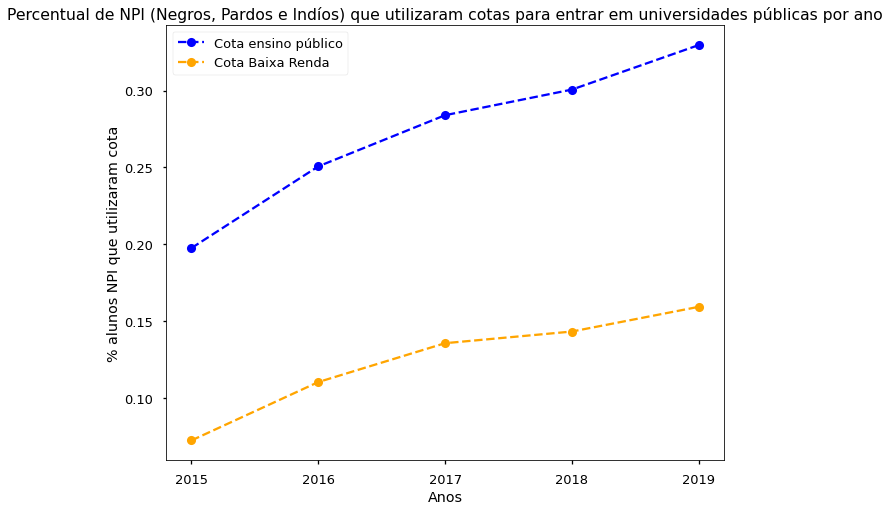

In [5]:
plt.figure(figsize=[10,8])
plt.plot(['2015','2016','2017','2018','2019'],NPI_RESERVA_ENSINO_1, 'b--',marker='o', color='blue',label = 'Cota ensino público')
plt.plot(['2015','2016','2017','2018','2019'],NPI_RESERVA_RENDA_1, 'b--',marker='o', color='orange',label ='Cota Baixa Renda')
plt.ylabel('% alunos NPI que utilizaram cota')
plt.xlabel('Anos')
plt.legend(loc = 0)
plt.title('Percentual de NPI (Negros, Pardos e Indíos) que utilizaram cotas para entrar em universidades públicas por ano')
plt.show()

   É interessante nota que a maior parte dos alunos NPI utilizam as cotas por estudar em colégio público, porém, cada vez mais alunos NPI utilizam a cota de baixa renda. Talvez o aumento do ingresso de alunos por esse cota seja resultado de um encolhimento da classe C dos últimos anos. 
    
   Um outro atitude que pode ser retirada deste gráfico é tentar mudar a regra de cotas para tentar máximizar o número de alunos NPI na universidade pública. Enquanto para o ano de 2019 o percentual de alunos NPI que utilizaram as cotas para alunos de baixa renda foi de aproximadamente 15%, o uso por alunos da rede pública foi de aproximadamente 35%. E como esse comportamento se mantém, uma possibilidade seria mudar o percentual de alunos NPI dentro do grupo de cotas das redes públicas e dos alunos de baixa renda. Colocaria um percentual maior de vagas para alunos NPI dentro das cotas que são destinadas para alunos de escolas públicas.


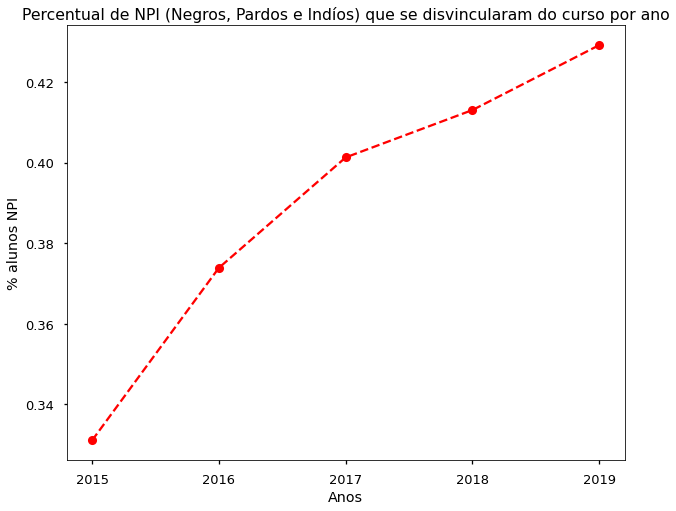

In [6]:
plt.figure(figsize=[10,8])
plt.plot(['2015','2016','2017','2018','2019'], NPI_DESVINCULADO_4, 'b--',marker='o', color='red',label='%NPI desvinculados')
plt.ylabel('% alunos NPI')
plt.xlabel('Anos')
plt.title('Percentual de NPI (Negros, Pardos e Indíos) que se disvincularam do curso por ano')
plt.show()

   Houve muita evolução no campo de incluir a população negra, parda e indígena na universidade, porém, o número de alunos NPI que desistem da faculdade também cresceu bastante. Em 2015 os alunos negros que abandonaram a faculdade na base de dados era de 32% e em 2019 esse percentual chegou a 45%. Em outras palavras, a cada 100 pessoas que desistiam da faculdade em 2015, 32 eram negras em 2019 esse número subiu para 45.

## Modelo de ML para identificar pessoas que irão sair da faculdade

   Além dessas descobertas simples porém que trazem uma certa luz sobre como está o perfil da universidade resolvi criar a minha própria contribuição para tentar diminuir o número de alunos que desistem da faculdade.Não criei a um modelo exclusivo para pessoas NPI pois queria ajudar o maior número de pessoas possível. 
   O modelo utiliza features desponíveis no censo para tentar identificar com a informação de um ano, alunos que irão desistir do curso no ano seguinte. 

In [7]:
from random import randint
import numpy as np

tp_co_aluno_curso_2018 = []
tp_situacao_lista = []
chunksize = 100000

for chunk in pd.read_csv('DM_ALUNO_2018.CSV',chunksize= chunksize,sep='|',usecols=['CO_ALUNO_CURSO','TP_SITUACAO','TP_CATEGORIA_ADMINISTRATIVA','TP_NIVEL_ACADEMICO']):

    chunk = chunk[(chunk['TP_SITUACAO'] == 4)|(chunk['TP_SITUACAO'] == 2)]
    chunk = chunk[(chunk['TP_CATEGORIA_ADMINISTRATIVA'] == 1)|(chunk['TP_CATEGORIA_ADMINISTRATIVA'] == 2)|(chunk['TP_CATEGORIA_ADMINISTRATIVA'] == 3)]
    chunk = chunk[(chunk['TP_NIVEL_ACADEMICO'] == 1)]
    tp_co_aluno_curso_2018 += list(chunk['CO_ALUNO_CURSO'])

    tp_situacao_lista += list(chunk['TP_SITUACAO'])


y = {'id_alunos-tp_situacao':tp_co_aluno_curso_2018,
     'tp_situacao':tp_situacao_lista }
dados = pd.DataFrame(y)

dados.to_csv('DESVINCULADOS_2018.CSV',index=False)

   Na célula acima foi separado todos os alunos de graduação que estão 'cursando'(0) ou 'desvínculado'(1). Utilizo o paramêtro chunksize para ir coletando os dados do csv aos poucos. Outro paramêtro muito útil do pandas é o usecols, que te permite carregar apenas as colunas que você deseja.
   Utilizamos a feature CO_ALUNO_CURSO para descobrir quem é cada aluno. O output desta célula é uma base de dados apenas com o código que vai permitir a gente identificar esses alunos em 2017 e o nosso alvo (0 ou 1).

In [4]:
import pandas as pd
from random import  randint
lista = pd.read_csv('DESVINCULADOS_2018.CSV')

lista = lista.reset_index()
print('importou')
maximo = lista.shape[0] -1
amostra = set()
print(maximo)
while len(amostra) < 500000:
    numero_aleatorio = randint(0,maximo)
    amostra.add(numero_aleatorio)
amostra = list(amostra)
amostra_selecionada = set([lista['id_alunos-tp_situacao'][elemento] for elemento in amostra])

print('amostra selecionada')
chunksize=100000
cont=0

base_desvinculados_2018_em_2017_x = pd.DataFrame()
for chunk in pd.read_csv('DM_ALUNO_2017.CSV',chunksize=chunksize,sep='|'):
    cont += 1

    chunk = chunk.set_index('CO_ALUNO_CURSO')

    codigoAluno = set(list(chunk.index))

    dados_desvin_2018_em_2017 = codigoAluno.intersection(amostra_selecionada)
    

    dados_novos = chunk.loc[dados_desvin_2018_em_2017,:] 
    dados_novos = dados_novos[((dados_novos['TP_SITUACAO']==2)|(dados_novos['TP_SITUACAO']==6))]
    base_desvinculados_2018_em_2017_x = pd.concat([base_desvinculados_2018_em_2017_x,dados_novos])

    if cont == maximo:
        break
        
array_alvo = []
lista = lista.set_index('id_alunos-tp_situacao')

for i in list(base_desvinculados_2018_em_2017_x.index):
    alvo = lista['tp_situacao'][i]

    array_alvo.append(alvo)

print(sum(array_alvo)/len(array_alvo))
base_desvinculados_2018_em_2017_x['target'] = array_alvo
base_desvinculados_2018_em_2017_x['target'] = base_desvinculados_2018_em_2017_x['target'].map({2:0,4:1})
base_desvinculados_2018_em_2017_x.to_csv('DATA_BASE_2018_2017.csv',index=False)
print('acabou')

importou
2117164
amostra selecionada
2.274565421545892
acabou


No código acima, pegamos os códigos dos alunos e identificamos eles em 2017 e separamos quem está cursando. Pois o objetivo é identificar o quem estava cursando ou estava trancado e deixou de cursar.

In [5]:
dados = pd.read_csv('DATA_BASE_2018_2017.csv')

dados['TP_TURNO'] = dados['TP_TURNO'].fillna(5)
dados['TP_GRAU_ACADEMICO'] = dados['TP_GRAU_ACADEMICO'].fillna(5)
dados['TP_DEFICIENCIA'] = dados['TP_DEFICIENCIA'].fillna(2)
dados['IN_RESERVA_ETNICO'] = dados['IN_RESERVA_ETNICO'].fillna(2)
dados['IN_RESERVA_ENSINO_PUBLICO'] = dados['IN_RESERVA_ENSINO_PUBLICO'].fillna(2)
dados['IN_RESERVA_RENDA_FAMILIAR'] = dados['IN_RESERVA_RENDA_FAMILIAR'].fillna(2)
dados['IN_FINANCIAMENTO_ESTUDANTIL'] = dados['IN_FINANCIAMENTO_ESTUDANTIL'].fillna(2)
dados['IN_COMPLEMENTAR_ESTAGIO'] = dados['IN_COMPLEMENTAR_ESTAGIO'].fillna(2)
dados['IN_COMPLEMENTAR_EXTENSAO'] = dados['IN_COMPLEMENTAR_EXTENSAO'].fillna(2)
dados['IN_COMPLEMENTAR_MONITORIA'] = dados['IN_COMPLEMENTAR_MONITORIA'].fillna(2)
dados['IN_COMPLEMENTAR_PESQUISA'] = dados['IN_COMPLEMENTAR_PESQUISA'].fillna(2)
dados['IN_BOLSA_ESTAGIO'] = dados['IN_BOLSA_ESTAGIO'].fillna(2)
dados['IN_BOLSA_EXTENSAO'] = dados['IN_BOLSA_EXTENSAO'].fillna(2)
dados['IN_BOLSA_MONITORIA'] = dados['IN_BOLSA_MONITORIA'].fillna(2)
dados['IN_BOLSA_PESQUISA'] = dados['IN_BOLSA_PESQUISA'].fillna(2)
dados['IN_ALUNO_PARFOR'] = dados['IN_ALUNO_PARFOR'].fillna(2)
dados['TP_MOBILIDADE_ACADEMICA'] = dados['TP_MOBILIDADE_ACADEMICA'].fillna(2)

dados['ANOS_NO_CURSO']= dados['NU_ANO_CENSO'] - dados['NU_ANO_INGRESSO'] 


dados = dados.drop(['CO_IES',
                    'CO_CURSO',
                    'NU_ANO_NASCIMENTO',
                    'NU_MES_NASCIMENTO',
                    'NU_DIA_NASCIMENTO',
                    'TP_NACIONALIDADE',
                    'CO_PAIS_ORIGEM',
                    'NU_ANO_INGRESSO',
                    'NU_ANO_CENSO',
                    'DT_INGRESSO_CURSO',
                    'CO_ALUNO',
                    'TP_CATEGORIA_ADMINISTRATIVA',
                    'TP_NIVEL_ACADEMICO'],axis=1) 
dados = dados.dropna(axis=1)

dados.to_csv('DADOS-2018-2017-LIMPOS.CSV', index=False)

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
dados = pd.read_csv('DADOS-2018-2017-LIMPOS.CSV')


x = dados.loc[:,['TP_SITUACAO','TP_COR_RACA','IN_BOLSA_MONITORIA','IN_RESERVA_RENDA_FAMILIAR']]


x = pd.get_dummies(x, columns = ['TP_SITUACAO',
                                 'TP_COR_RACA',
                                 'IN_BOLSA_MONITORIA',
                                 'IN_RESERVA_RENDA_FAMILIAR'],drop_first = True)
y = dados['target']


rf = RandomForestClassifier(class_weight = 'balanced')

scores = cross_val_score(rf,x,y,scoring='recall',cv=3)
print('recall')
print(scores.mean())

scores = cross_val_score(rf,x,y,scoring='precision',cv=3)
print('precision')
print(scores.mean())

recall
0.6118676985916408
precision
0.140090193256439


   Esse modelo mesmo que ainda muito no inicio ( Faltaria fazer feature select, tunning hiperpamêtros ) já mostra o potêncial do modelo de ML. Ele tem um reccal médio de 58%, isso significa que de todos que vão trancar, ele encontrou 61% por cento. Este modelo auxíliando um coordenador de curso pode direcionar a atenção do coordenador para 61% dos alunos que iriam desistir do curso.
   A precision mostra que de todos que o modelo classificou como desistente, quantos realmente estão desistindo. Aqui mora o calcanhar de aquiles desse modelo inicial. De todos que o modelo classificar como desistentes, apenas 14% estaram certo. Entretanto é melhor descobrir 14% do que ficar completamente no escuro.